**Import packages**

In [23]:
!pip install pytictoc

In [24]:
!pip install tensorflow

In [25]:
import random
import tensorflow as tf
from tensorflow import keras
from keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import warnings
import pandas as pd
from pytictoc import TicToc
warnings.filterwarnings( "ignore" )

**Load the dataset**

In [26]:
(X_train, y_train), (X_test,y_test) = keras.datasets.cifar10.load_data()
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000,), (10000, 32, 32, 3), (10000,))

**Create helper functions**

In [27]:
def plot_sample_image(X, y):
    plt.figure(figsize = (15,2))
    plt.imshow(X)
    classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
    plt.xlabel('Image Label: {}'.format(classes[y]))

def classification_results(X_test,y_test,y_pred_classes):
  from sklearn.metrics import confusion_matrix , classification_report
  import seaborn as sn

  cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_classes)
  plt.figure(figsize = (7,5))
  sn.heatmap(cm, annot=True, fmt='d', cmap='Greens')
  plt.xlabel('Predicted');
  plt.ylabel('Truth');

  print("Classification Report: \n", classification_report(y_test, y_pred_classes))

def plot_fitting_history(history,filename,dpi):
  epochs = len(history.history['loss'])
  epoch_data = np.arange(1,epochs+1)
  plt.plot(epoch_data,history.history['loss'],'o-')
  plt.plot(epoch_data,history.history['val_loss'],'o--')
  plt.ylabel('Loss')
  plt.xlabel('Epoch sequence' )
  plt.xticks(np.arange(0, epochs + 1, step=1))
  plt.legend(['Training','Validation'])
  plt.savefig(filename, dpi=dpi)
  plt.show()

**Normalize the input data**

In [28]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [29]:
# from google.colab import drive
# drive.mount('/content/gdrive')
# # %cd /content/gdrive/MyDrive/ECE 696B/Project - ECE696B
# %cd /content/gdrive/MyDrive/Colab Notebooks

**Load the models**

In [30]:
%cd C:\Users\nh202\My Drive (nh202@arizona.edu)\ECE 696B\Project - ECE696B
from keras.models import load_model
Linear_CIFAR10 = load_model('Linear_CIFAR10.h5')
MLP_CIFAR10 = load_model('MLP_CIFAR10.h5')
CNN_CIFAR10 = load_model('CNN_CIFAR10.h5')

C:\Users\nh202\My Drive (nh202@arizona.edu)\ECE 696B\Project - ECE696B


# Fast gradient sign method (FGSM) attack

**Function for FGSM attack**

In [51]:
def fgsm_attack(model, x, y_true, eps):

    x_tensor = tf.convert_to_tensor(x)
    
    # Set tape to watch the input tensor
    with tf.GradientTape() as tape:
        tape.watch(x_tensor)
        y_pred = model(x_tensor)
        loss = tf.keras.losses.sparse_categorical_crossentropy(y_true, y_pred)  
    
    # Calculate the gradient of the loss with respect to the input image
    grads = tape.gradient(loss, x_tensor)
    
    # Calculate the sign of the gradient
    sign = tf.math.sign(grads)    

    # Notes:
    # sign[0] matches the shape of x, sign matches the shape of x_tensor
    # print(sign[0].shape, x.shape, sign.shape, x_tensor.shape)
    
    # Generate the adversarial example by adding the sign of the gradient times epsilon to the input image    
    x_adv = x + eps * sign
    
    # Clip the adversarial example to maintain pixel values in [0,1] range
    x_adv = tf.clip_by_value(x_adv, clip_value_min=0, clip_value_max=1)
    
    return x_adv.numpy()

# Adversarial training of Linear model

In [23]:
# indexes = np.arange(0,5000); eps = 0.1
# X_train_FGSM_Linear_1 = fgsm_attack(Linear_CIFAR10,X_train[indexes],y_train[indexes],eps)

# indexes = np.arange(5000,7500); eps = 0.2
# X_train_FGSM_Linear_2 = fgsm_attack(Linear_CIFAR10,X_train[indexes],y_train[indexes],eps)

# indexes = np.arange(7500,8750); eps = 0.3
# X_train_FGSM_Linear_3 = fgsm_attack(Linear_CIFAR10,X_train[indexes],y_train[indexes],eps)

# indexes = np.arange(8750, 9375); eps = 0.4
# X_train_FGSM_Linear_4 = fgsm_attack(Linear_CIFAR10,X_train[indexes],y_train[indexes],eps)

# indexes = np.arange(9375, 10000); eps = 0.5
# X_train_FGSM_Linear_5 = fgsm_attack(Linear_CIFAR10,X_train[indexes],y_train[indexes],eps)

# X_train_FGSM_Linear = np.concatenate((X_train_FGSM_Linear_1, X_train_FGSM_Linear_2, X_train_FGSM_Linear_3,\
#                                 X_train_FGSM_Linear_4, X_train_FGSM_Linear_5), axis = 0)

# indexes = range(10000)
# avg_l2_norm = np.mean(np.sqrt(np.sum((X_train_FGSM_Linear-X_train[indexes])**2, axis=(1,2,3))))
# print("Average l2 distance of the perturbation:", avg_l2_norm)

In [24]:
# X_train_stack = np.concatenate((X_train, X_train_FGSM_Linear), axis = 0)
# y_train_stack = np.concatenate((y_train, y_train[indexes]), axis = 0)

# p = np.random.permutation(len(X_train_stack))
# X_train_stack, y_train_stack = X_train_stack[p], y_train_stack[p]

# X_train_stack.shape, y_train_stack.shape

In [25]:
# import random
# import tensorflow as tf
# seed = 42
# random.seed(seed)
# np.random.seed(seed)
# tf.random.set_seed(seed)

# Linear_CIFAR10 = models.Sequential([
#         layers.Flatten(input_shape=X_train.shape[1:]),
#         layers.Dense(10, activation='softmax'),  
#     ])

# learning_rate =  0.0001
# Linear_CIFAR10.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

# early_callbacks = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)
# history_C_Linear_FGSM = Linear_CIFAR10.fit(X_train_stack, y_train_stack, epochs=200, batch_size=32,
#             validation_split = 0.1, callbacks = early_callbacks, verbose=1, shuffle = True)

In [26]:
# filename = 'FGSM Adversarial Training history CIFAR10 [Linear]'+'.png'
# plot_fitting_history(history_C_Linear_FGSM, filename, dpi = 100)

In [27]:
# y_pred = Linear_CIFAR10.predict(X_test)
# y_pred_classes = [np.argmax(element) for element in y_pred]
# classification_results(X_test,y_test,y_pred_classes)

In [28]:
# Linear_CIFAR10.save('Linear_CIFAR10_FGSM_trained.h5')

# Adversarial training of MLP model

In [30]:
indexes = np.arange(0,5000); eps = 0.1
X_train_FGSM_MLP_1 = fgsm_attack(MLP_CIFAR10,X_train[indexes],y_train[indexes],eps)

indexes = np.arange(5000,7500); eps = 0.2
X_train_FGSM_MLP_2 = fgsm_attack(MLP_CIFAR10,X_train[indexes],y_train[indexes],eps)

indexes = np.arange(7500,8750); eps = 0.3
X_train_FGSM_MLP_3 = fgsm_attack(MLP_CIFAR10,X_train[indexes],y_train[indexes],eps)

indexes = np.arange(8750, 9375); eps = 0.4
X_train_FGSM_MLP_4 = fgsm_attack(MLP_CIFAR10,X_train[indexes],y_train[indexes],eps)

indexes = np.arange(9375, 10000); eps = 0.5
X_train_FGSM_MLP_5 = fgsm_attack(MLP_CIFAR10,X_train[indexes],y_train[indexes],eps)

X_train_FGSM_MLP = np.concatenate((X_train_FGSM_MLP_1, X_train_FGSM_MLP_2, X_train_FGSM_MLP_3,\
                                X_train_FGSM_MLP_4, X_train_FGSM_MLP_5), axis = 0)

indexes = range(10000)
avg_l2_norm = np.mean(np.sqrt(np.sum((X_train_FGSM_MLP-X_train[indexes])**2, axis=(1,2,3))))
print("Average l2 distance of the perturbation:", avg_l2_norm)

Average l2 distance of the perturbation: 9.964862718364214


In [ ]:
X_train_stack = np.concatenate((X_train, X_train_FGSM_MLP), axis = 0)
y_train_stack = np.concatenate((y_train, y_train[indexes]), axis = 0)

p = np.random.permutation(len(X_train_stack))
X_train_stack, y_train_stack = X_train_stack[p], y_train_stack[p]

X_train_stack.shape, y_train_stack.shape

In [ ]:
import random
import tensorflow as tf
seed = 42
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

MLP_CIFAR10 = models.Sequential([
        layers.Flatten(input_shape=X_train.shape[1:]),
        layers.Dense(1024, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(1024, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')    
    ])

learning_rate =  0.0001
MLP_CIFAR10.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

early_callbacks = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)
history_C_MLP_FGSM = MLP_CIFAR10.fit(X_train_stack, y_train_stack, epochs=200, batch_size=32,
            validation_split = 0.1, callbacks = early_callbacks, verbose=1, shuffle = True)

In [ ]:
filename = 'FGSM Adversarial Training history CIFAR10 [MLP]'+'.png'
plot_fitting_history(history_C_MLP_FGSM, filename, dpi = 100)

In [ ]:
y_pred = MLP_CIFAR10.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
classification_results(X_test,y_test,y_pred_classes)

In [ ]:
MLP_CIFAR10.save('MLP_CIFAR10_FGSM_trained.h5')

# Adversarial training of CNN model

In [ ]:
indexes = np.arange(0,1250); eps = 0.1
X_train_FGSM_CNN_11 = fgsm_attack(CNN_CIFAR10,X_train[indexes],y_train[indexes],eps)

indexes = np.arange(1250,2500); eps = 0.1
X_train_FGSM_CNN_12 = fgsm_attack(CNN_CIFAR10,X_train[indexes],y_train[indexes],eps)

indexes = np.arange(2500,3750); eps = 0.1
X_train_FGSM_CNN_13 = fgsm_attack(CNN_CIFAR10,X_train[indexes],y_train[indexes],eps)

indexes = np.arange(3750,5000); eps = 0.1
X_train_FGSM_CNN_14 = fgsm_attack(CNN_CIFAR10,X_train[indexes],y_train[indexes],eps)

indexes = np.arange(5000,6250); eps = 0.2
X_train_FGSM_CNN_21 = fgsm_attack(CNN_CIFAR10,X_train[indexes],y_train[indexes],eps)

indexes = np.arange(6250,7500); eps = 0.2
X_train_FGSM_CNN_22 = fgsm_attack(CNN_CIFAR10,X_train[indexes],y_train[indexes],eps)

indexes = np.arange(7500,8750); eps = 0.3
X_train_FGSM_CNN_3 = fgsm_attack(CNN_CIFAR10,X_train[indexes],y_train[indexes],eps)

indexes = np.arange(8750, 9375); eps = 0.4
X_train_FGSM_CNN_4 = fgsm_attack(CNN_CIFAR10,X_train[indexes],y_train[indexes],eps)

indexes = np.arange(9375, 10000); eps = 0.5
X_train_FGSM_CNN_5 = fgsm_attack(CNN_CIFAR10,X_train[indexes],y_train[indexes],eps)

X_train_FGSM_CNN = np.concatenate((X_train_FGSM_CNN_11, X_train_FGSM_CNN_12, X_train_FGSM_CNN_13, \
                                   X_train_FGSM_CNN_14, X_train_FGSM_CNN_21, X_train_FGSM_CNN_22,\
                                   X_train_FGSM_CNN_3, X_train_FGSM_CNN_4, X_train_FGSM_CNN_5), axis = 0)

indexes = range(10000)
avg_l2_norm = np.mean(np.sqrt(np.sum((X_train_FGSM_CNN-X_train[indexes])**2, axis=(1,2,3))))
print("Average l2 distance of the perturbation:", avg_l2_norm)

In [ ]:
X_train_stack = np.concatenate((X_train, X_train_FGSM_CNN), axis = 0)
y_train_stack = np.concatenate((y_train, y_train[indexes]), axis = 0)

p = np.random.permutation(len(X_train_stack))
X_train_stack, y_train_stack = X_train_stack[p], y_train_stack[p]

X_train_stack.shape, y_train_stack.shape

In [ ]:
import random
import tensorflow as tf
seed = 42
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

CNN_CIFAR10 = models.Sequential([

    layers.Conv2D(128, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),

    layers.Dense(2048, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    layers.Dense(1024, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    
    layers.Dense(256, activation='relu'), 
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    layers.Dense(10, activation='softmax'),
])

learning_rate =  0.0001
CNN_CIFAR10.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

early_callbacks = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)
history_C_CNN_FGSM = CNN_CIFAR10.fit(X_train_stack, y_train_stack, epochs=200, batch_size=32,
            validation_split = 0.1, callbacks = early_callbacks, verbose=1, shuffle = True)

In [ ]:
filename = 'FGSM Adversarial Training history CIFAR10 [CNN]'+'.png'
plot_fitting_history(history_C_CNN_FGSM, filename, dpi = 100)

In [ ]:
y_pred = CNN_CIFAR10.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
classification_results(X_test,y_test,y_pred_classes)

In [ ]:
CNN_CIFAR10.save('CNN_CIFAR10_FGSM_trained.h5')

# Evaluate performance of adversarial training

In [31]:
%cd C:\Users\nh202\My Drive (nh202@arizona.edu)\ECE 696B\Project - ECE696B
from keras.models import load_model
Linear_CIFAR10 = load_model('Linear_CIFAR10_FGSM_trained.h5')
MLP_CIFAR10 = load_model('MLP_CIFAR10_FGSM_trained.h5')
CNN_CIFAR10 = load_model('CNN_CIFAR10_FGSM_trained.h5')

C:\Users\nh202\My Drive (nh202@arizona.edu)\ECE 696B\Project - ECE696B


In [32]:
indexes = range(1000)
print('Test accuracy on unperturbed data')
Linear_CIFAR10.evaluate(X_test[indexes],y_test[indexes])
MLP_CIFAR10.evaluate(X_test[indexes],y_test[indexes])
CNN_CIFAR10.evaluate(X_test[indexes],y_test[indexes])
print('\n')

Test accuracy on unperturbed data
32/32 [==============================] - 4s 114ms/step - loss: 0.5391 - accuracy: 0.8510




In [33]:
%cd C:\Users\nh202\OneDrive - University of Arizona\Adversairal Examples - ECE 696B\FGSM

C:\Users\nh202\OneDrive - University of Arizona\Adversairal Examples - ECE 696B\FGSM


**Performance on adversarial examples**

In [34]:
indexes = range(1000)
for eps in np.arange(0.1,1.1,0.1):
    
  print(f'eps value: {np.round(eps,1)}')

  np_array_filename = 'CIFAR10_FGSM_'+ str(len(indexes)) +'_adv_examples_eps_'+ str(round(eps,1)) + '.npz'
  data = np.load(np_array_filename)

  # access the arrays using their keys
  X_test_FGSM_Linear = data['X_test_FGSM_Linear']
  X_test_FGSM_MLP = data['X_test_FGSM_MLP']
  X_test_FGSM_CNN = data['X_test_FGSM_CNN']

  stored_results = []
  print('\n')
  print('Test accuracy on perturbed data targeted for Linear model')
  avg_l2_norm_Linear = np.mean(np.sqrt(np.sum((X_test_FGSM_Linear-X_test[:len(indexes)])**2, axis=(1,2,3))))
  stored_results.append(avg_l2_norm_Linear)
  _, accuracy = Linear_CIFAR10.evaluate(X_test_FGSM_Linear[indexes],y_test[indexes])
  stored_results.append(accuracy)
  _, accuracy = MLP_CIFAR10.evaluate(X_test_FGSM_Linear[indexes],y_test[indexes])
  stored_results.append(accuracy)
  _, accuracy = CNN_CIFAR10.evaluate(X_test_FGSM_Linear[indexes],y_test[indexes])
  stored_results.append(accuracy)
  print('\n')
  print('Test accuracy on perturbed data targeted for MLP model')
  avg_l2_norm_MLP = np.mean(np.sqrt(np.sum((X_test_FGSM_MLP-X_test[:len(indexes)])**2, axis=(1,2,3))))
  stored_results.append(avg_l2_norm_MLP)
  _, accuracy = Linear_CIFAR10.evaluate(X_test_FGSM_MLP[indexes],y_test[indexes])
  stored_results.append(accuracy)
  _, accuracy = MLP_CIFAR10.evaluate(X_test_FGSM_MLP[indexes],y_test[indexes])
  stored_results.append(accuracy)
  _, accuracy = CNN_CIFAR10.evaluate(X_test_FGSM_MLP[indexes],y_test[indexes])
  stored_results.append(accuracy)
  print('\n')
  print('Test accuracy on perturbed data targeted for CNN model')
  avg_l2_norm_CNN = np.mean(np.sqrt(np.sum((X_test_FGSM_CNN-X_test[:len(indexes)])**2, axis=(1,2,3))))
  stored_results.append(avg_l2_norm_CNN)
  _, accuracy = Linear_CIFAR10.evaluate(X_test_FGSM_CNN[indexes],y_test[indexes])
  stored_results.append(accuracy)
  _, accuracy = MLP_CIFAR10.evaluate(X_test_FGSM_CNN[indexes],y_test[indexes])
  stored_results.append(accuracy)
  _, accuracy = CNN_CIFAR10.evaluate(X_test_FGSM_CNN[indexes],y_test[indexes])
  stored_results.append(accuracy)
  print()

  stored_results = np.array(stored_results)
  stored_results = stored_results.reshape(-1,4)
  df = pd.DataFrame(stored_results, columns = ['avg_l2_norm','Linear_CIFAR10_test_accuray',\
                                   'MLP_CIFAR10_test_accuray','CNN_CIFAR10_test_accuray'])

  filename = 'Post training Adversarial_Attacks_CIFAR10_'+ str(len(indexes)) +' [FGSM Attack - eps '+ str(round(eps,1)) + '].csv'
  df.to_csv(filename, index=False)

eps value: 0.1


Test accuracy on perturbed data targeted for Linear model
32/32 [==============================] - 4s 119ms/step - loss: 1.8205 - accuracy: 0.5680


Test accuracy on perturbed data targeted for MLP model
32/32 [==============================] - 4s 111ms/step - loss: 2.4129 - accuracy: 0.4980


Test accuracy on perturbed data targeted for CNN model
32/32 [==============================] - 3s 107ms/step - loss: 0.7548 - accuracy: 0.7880

eps value: 0.2


Test accuracy on perturbed data targeted for Linear model
32/32 [==============================] - 4s 114ms/step - loss: 3.0854 - accuracy: 0.3640


Test accuracy on perturbed data targeted for MLP model
32/32 [==============================] - 4s 115ms/step - loss: 3.9556 - accuracy: 0.2590


Test accuracy on perturbed data targeted for CNN model
32/32 [==============================] - 4s 111ms/step - loss: 0.8695 - accuracy: 0.7800

eps value: 0.3


Test accuracy on perturbed data targeted for Linear model
32/32 [====

32/32 [==============================] - 4s 124ms/step - loss: 5.0376 - accuracy: 0.1850


Test accuracy on perturbed data targeted for MLP model
32/32 [==============================] - 4s 113ms/step - loss: 5.2519 - accuracy: 0.1500


Test accuracy on perturbed data targeted for CNN model
32/32 [==============================] - 4s 119ms/step - loss: 3.2418 - accuracy: 0.3390

eps value: 1.0


Test accuracy on perturbed data targeted for Linear model
32/32 [==============================] - 4s 127ms/step - loss: 5.0305 - accuracy: 0.1830


Test accuracy on perturbed data targeted for MLP model
32/32 [==============================] - 4s 115ms/step - loss: 5.2446 - accuracy: 0.1520


Test accuracy on perturbed data targeted for CNN model
32/32 [==============================] - 4s 118ms/step - loss: 3.2794 - accuracy: 0.3330



# Compile the results into a dataframe

In [35]:
target_models = []
for i in range(10):
    target_models.append('Linear')
    target_models.append('MLP')    
    target_models.append('CNN') 
target_models = np.array(target_models).reshape(-1,1)

In [36]:
eps_values = []
for eps in np.arange(0.1,1.1,0.1):
    eps_values.append(eps)
    eps_values.append(eps)    
    eps_values.append(eps) 
eps_values = np.array(eps_values).reshape(-1,1)

In [37]:
df_all = pd.DataFrame()
for eps in np.arange(0.1,1.1,0.1):
    filename = 'Post training Adversarial_Attacks_CIFAR10_'+ str(len(indexes)) +' [FGSM Attack - eps '+ str(round(eps,1)) + '].csv'
    df = pd.read_csv(filename)
    df_all = pd.concat([df_all, df], ignore_index=True)
df_all['Target model'] = target_models
df_all['eps value'] = eps_values
df_all = df_all[['eps value', 'Target model', 'avg_l2_norm', 'Linear_CIFAR10_test_accuray', 'MLP_CIFAR10_test_accuray',
       'CNN_CIFAR10_test_accuray']]
df_all.to_csv('Post training Adversarial_Attacks_CIFAR10 [FGSM Attack].csv', index=False)
df_all

,eps value,Target model,avg_l2_norm,Linear_CIFAR10_test_accuray,MLP_CIFAR10_test_accuray,CNN_CIFAR10_test_accuray
0,0.1,Linear,5.428031,0.985,0.235,0.568
1,0.1,MLP,5.429167,0.027,0.839,0.498
2,0.1,CNN,5.428654,0.319,0.387,0.788
3,0.2,Linear,10.591667,0.999,0.135,0.364
4,0.2,MLP,10.595510,0.001,0.886,0.259
5,0.2,CNN,10.590528,0.245,0.320,0.780
6,0.3,Linear,15.359060,1.000,0.081,0.253
7,0.3,MLP,15.367175,0.000,0.898,0.182
8,0.3,CNN,15.351246,0.179,0.242,0.715
9,0.4,Linear,19.613840,1.000,0.061,0.207


# Prepare the plots

Test accuracy on unperturbed data
32/32 [==============================] - 4s 121ms/step - loss: 0.5391 - accuracy: 0.8510
Test accuracy on unperturbed data
32/32 [==============================] - 4s 116ms/step - loss: 0.5391 - accuracy: 0.8510


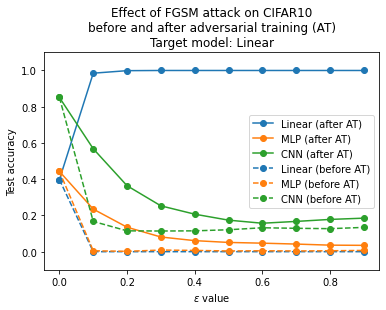

In [13]:
df_all = pd.read_csv('Post training Adversarial_Attacks_CIFAR10 [FGSM Attack].csv')
df_Linear = df_all[df_all['Target model']=='Linear']
df_Linear = df_Linear.shift(1)
print('Test accuracy on unperturbed data')
_, accurcy_Linear = Linear_CIFAR10.evaluate(X_test[indexes],y_test[indexes]);
_, accurcy_MLP = MLP_CIFAR10.evaluate(X_test[indexes],y_test[indexes]);
_, accurcy_CNN = CNN_CIFAR10.evaluate(X_test[indexes],y_test[indexes]);
df_Linear.iloc[0] = [0, '-', 0, accurcy_Linear, accurcy_MLP, accurcy_CNN]
df_Linear
plt.plot(df_Linear['eps value'],df_Linear['Linear_CIFAR10_test_accuray'],'o-')
plt.plot(df_Linear['eps value'],df_Linear['MLP_CIFAR10_test_accuray'],'o-')
plt.plot(df_Linear['eps value'],df_Linear['CNN_CIFAR10_test_accuray'],'o-')

df_all = pd.read_csv('Adversarial_Attacks_CIFAR10 [FGSM Attack].csv')
df_Linear = df_all[df_all['Target model']=='Linear']
df_Linear = df_Linear.shift(1)
print('Test accuracy on unperturbed data')
_, accurcy_Linear = Linear_CIFAR10.evaluate(X_test[indexes],y_test[indexes]);
_, accurcy_MLP = MLP_CIFAR10.evaluate(X_test[indexes],y_test[indexes]);
_, accurcy_CNN = CNN_CIFAR10.evaluate(X_test[indexes],y_test[indexes]);
df_Linear.iloc[0] = [0, '-', 0, accurcy_Linear, accurcy_MLP, accurcy_CNN]
df_Linear
plt.plot(df_Linear['eps value'],df_Linear['Linear_CIFAR10_test_accuray'],'o--', color = 'C0')
plt.plot(df_Linear['eps value'],df_Linear['MLP_CIFAR10_test_accuray'],'o--', color = 'C1')
plt.plot(df_Linear['eps value'],df_Linear['CNN_CIFAR10_test_accuray'],'o--', color = 'C2')

plt.xlabel('$\epsilon$ value')
plt.ylabel('Test accuracy')
plt.ylim([-0.1, 1.1])
# plt.legend(['Linear (after AT)', 'Linear (before AT)'])
plt.legend(['Linear (after AT)', 'MLP (after AT)','CNN (after AT)', \
            'Linear (before AT)', 'MLP (before AT)','CNN (before AT)'])
plt.title('Effect of FGSM attack on CIFAR10\nbefore and after adversarial training (AT)\nTarget model: Linear')
plt.savefig('Post training Effect of FGSM attack on CIFAR10 for Linear model [eps]', dpi=600)
plt.show()

Test accuracy on unperturbed data
32/32 [==============================] - 4s 132ms/step - loss: 0.5391 - accuracy: 0.8510
Test accuracy on unperturbed data
32/32 [==============================] - 4s 115ms/step - loss: 0.5391 - accuracy: 0.8510


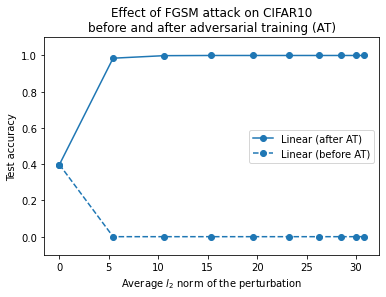

In [21]:
df_all = pd.read_csv('Post training Adversarial_Attacks_CIFAR10 [FGSM Attack].csv')
df_Linear = df_all[df_all['Target model']=='Linear']
df_Linear = df_Linear.shift(1)
print('Test accuracy on unperturbed data')
_, accurcy_Linear = Linear_CIFAR10.evaluate(X_test[indexes],y_test[indexes]);
_, accurcy_MLP = MLP_CIFAR10.evaluate(X_test[indexes],y_test[indexes]);
_, accurcy_CNN = CNN_CIFAR10.evaluate(X_test[indexes],y_test[indexes]);
df_Linear.iloc[0] = ['-', '-', 0, accurcy_Linear, accurcy_MLP, accurcy_CNN]
df_Linear
# plt.plot(df_Linear['avg_l2_norm'],df_Linear['Linear_CIFAR10_test_accuray'],'o-')
# plt.plot(df_Linear['avg_l2_norm'],df_Linear['MLP_CIFAR10_test_accuray'],'o-')
# plt.plot(df_Linear['avg_l2_norm'],df_Linear['CNN_CIFAR10_test_accuray'],'o-')
plt.plot(df_Linear['avg_l2_norm'],df_Linear['Linear_CIFAR10_test_accuray'],'o-', color = 'C0')

df_all = pd.read_csv('Adversarial_Attacks_CIFAR10 [FGSM Attack].csv')
df_Linear = df_all[df_all['Target model']=='Linear']
df_Linear = df_Linear.shift(1)
print('Test accuracy on unperturbed data')
_, accurcy_Linear = Linear_CIFAR10.evaluate(X_test[indexes],y_test[indexes]);
_, accurcy_MLP = MLP_CIFAR10.evaluate(X_test[indexes],y_test[indexes]);
_, accurcy_CNN = CNN_CIFAR10.evaluate(X_test[indexes],y_test[indexes]);
df_Linear.iloc[0] = ['-', '-', 0, accurcy_Linear, accurcy_MLP, accurcy_CNN]
df_Linear
plt.plot(df_Linear['avg_l2_norm'],df_Linear['Linear_CIFAR10_test_accuray'],'o--', color = 'C0')
# plt.plot(df_Linear['avg_l2_norm'],df_Linear['MLP_CIFAR10_test_accuray'],'o--', color = 'C1')
# plt.plot(df_Linear['avg_l2_norm'],df_Linear['CNN_CIFAR10_test_accuray'],'o--', color = 'C2')

plt.xlabel('Average $l_2$ norm of the perturbation')
plt.ylabel('Test accuracy')
plt.ylim([-0.1, 1.1])
plt.legend(['Linear (after AT)', 'Linear (before AT)'])
# plt.legend(['Linear (after AT)', 'MLP (after AT)','CNN (after AT)', \
#             'Linear (before AT)', 'MLP (before AT)','CNN (before AT)'])
plt.title('Effect of FGSM attack on CIFAR10\nbefore and after adversarial training (AT)') #\nTarget model: Linear')
plt.savefig('Post training Effect of FGSM attack on CIFAR10 for Linear model [l2 norm]_1', dpi=600)
plt.show()

In [ ]:
df_all = pd.read_csv('Post training Adversarial_Attacks_CIFAR10 [FGSM Attack].csv')
df_MLP = df_all[df_all['Target model']=='MLP']
df_MLP = df_MLP.shift(1)
print('Test accuracy on unperturbed data')
_, accurcy_Linear = Linear_CIFAR10.evaluate(X_test[indexes],y_test[indexes]);
_, accurcy_MLP = MLP_CIFAR10.evaluate(X_test[indexes],y_test[indexes]);
_, accurcy_CNN = CNN_CIFAR10.evaluate(X_test[indexes],y_test[indexes]);
df_MLP.iloc[0] = [0, '-', 0, accurcy_Linear, accurcy_MLP, accurcy_CNN]
df_MLP
plt.plot(df_MLP['eps value'],df_MLP['Linear_CIFAR10_test_accuray'],'o-')
plt.plot(df_MLP['eps value'],df_MLP['MLP_CIFAR10_test_accuray'],'o-')
plt.plot(df_MLP['eps value'],df_MLP['CNN_CIFAR10_test_accuray'],'o-')

df_all = pd.read_csv('Adversarial_Attacks_CIFAR10 [FGSM Attack].csv')
df_MLP = df_all[df_all['Target model']=='MLP']
df_MLP = df_MLP.shift(1)
print('Test accuracy on unperturbed data')
_, accurcy_Linear = Linear_CIFAR10.evaluate(X_test[indexes],y_test[indexes]);
_, accurcy_MLP = MLP_CIFAR10.evaluate(X_test[indexes],y_test[indexes]);
_, accurcy_CNN = CNN_CIFAR10.evaluate(X_test[indexes],y_test[indexes]);
df_MLP.iloc[0] = [0, '-', 0, accurcy_Linear, accurcy_MLP, accurcy_CNN]
df_MLP
plt.plot(df_MLP['eps value'],df_MLP['Linear_CIFAR10_test_accuray'],'o--', color = 'C0')
plt.plot(df_MLP['eps value'],df_MLP['MLP_CIFAR10_test_accuray'],'o--', color = 'C1')
plt.plot(df_MLP['eps value'],df_MLP['CNN_CIFAR10_test_accuray'],'o--', color = 'C2')

plt.xlabel('$\epsilon$ value')
plt.ylabel('Test accuracy')
plt.ylim([-0.1, 1.1])
# plt.legend(['MLP (after AT)', 'MLP (before AT)'])
plt.legend(['Linear (after AT)', 'MLP (after AT)','CNN (after AT)', \
            'Linear (before AT)', 'MLP (before AT)','CNN (before AT)'])
plt.title('Effect of FGSM attack on CIFAR10\nbefore and after adversarial training (AT)\nTarget model: MLP')
plt.savefig('Post training Effect of FGSM attack on CIFAR10 for MLP model [eps]', dpi=600)
plt.show()

Test accuracy on unperturbed data
32/32 [==============================] - 4s 129ms/step - loss: 0.5391 - accuracy: 0.8510
Test accuracy on unperturbed data
32/32 [==============================] - 4s 124ms/step - loss: 0.5391 - accuracy: 0.8510


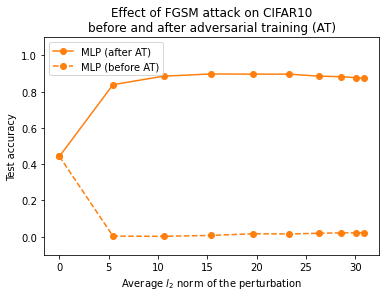

In [20]:
df_all = pd.read_csv('Post training Adversarial_Attacks_CIFAR10 [FGSM Attack].csv')
df_MLP = df_all[df_all['Target model']=='MLP']
df_MLP = df_MLP.shift(1)
print('Test accuracy on unperturbed data')
_, accurcy_Linear = Linear_CIFAR10.evaluate(X_test[indexes],y_test[indexes]);
_, accurcy_MLP = MLP_CIFAR10.evaluate(X_test[indexes],y_test[indexes]);
_, accurcy_CNN = CNN_CIFAR10.evaluate(X_test[indexes],y_test[indexes]);
df_MLP.iloc[0] = ['-', '-', 0, accurcy_Linear, accurcy_MLP, accurcy_CNN]
df_MLP
# plt.plot(df_MLP['avg_l2_norm'],df_MLP['Linear_CIFAR10_test_accuray'],'o-')
# plt.plot(df_MLP['avg_l2_norm'],df_MLP['MLP_CIFAR10_test_accuray'],'o-')
# plt.plot(df_MLP['avg_l2_norm'],df_MLP['CNN_CIFAR10_test_accuray'],'o-')
plt.plot(df_MLP['avg_l2_norm'],df_MLP['MLP_CIFAR10_test_accuray'],'o-', color = 'C1')

df_all = pd.read_csv('Adversarial_Attacks_CIFAR10 [FGSM Attack].csv')
df_MLP = df_all[df_all['Target model']=='MLP']
df_MLP = df_MLP.shift(1)
print('Test accuracy on unperturbed data')
_, accurcy_Linear = Linear_CIFAR10.evaluate(X_test[indexes],y_test[indexes]);
_, accurcy_MLP = MLP_CIFAR10.evaluate(X_test[indexes],y_test[indexes]);
_, accurcy_CNN = CNN_CIFAR10.evaluate(X_test[indexes],y_test[indexes]);
df_MLP.iloc[0] = ['-', '-', 0, accurcy_Linear, accurcy_MLP, accurcy_CNN]
df_MLP
# plt.plot(df_MLP['avg_l2_norm'],df_MLP['Linear_CIFAR10_test_accuray'],'o--', color = 'C0')
plt.plot(df_MLP['avg_l2_norm'],df_MLP['MLP_CIFAR10_test_accuray'],'o--', color = 'C1')
# plt.plot(df_MLP['avg_l2_norm'],df_MLP['CNN_CIFAR10_test_accuray'],'o--', color = 'C2')

plt.xlabel('Average $l_2$ norm of the perturbation')
plt.ylabel('Test accuracy')
plt.ylim([-0.1, 1.1])
plt.legend(['MLP (after AT)', 'MLP (before AT)'])
# plt.legend(['Linear (after AT)', 'MLP (after AT)','CNN (after AT)', \
#             'Linear (before AT)', 'MLP (before AT)','CNN (before AT)'])
plt.title('Effect of FGSM attack on CIFAR10\nbefore and after adversarial training (AT)') #\nTarget model: MLP')
plt.savefig('Post training Effect of FGSM attack on CIFAR10 for MLP model [l2 norm]_1', dpi=600)
plt.show()

In [ ]:
df_all = pd.read_csv('Post training Adversarial_Attacks_CIFAR10 [FGSM Attack].csv')
df_CNN = df_all[df_all['Target model']=='CNN']
df_CNN = df_CNN.shift(1)
print('Test accuracy on unperturbed data')
_, accurcy_Linear = Linear_CIFAR10.evaluate(X_test[indexes],y_test[indexes]);
_, accurcy_MLP = MLP_CIFAR10.evaluate(X_test[indexes],y_test[indexes]);
_, accurcy_CNN = CNN_CIFAR10.evaluate(X_test[indexes],y_test[indexes]);
df_CNN.iloc[0] = [0, '-', 0, accurcy_Linear, accurcy_MLP, accurcy_CNN]
df_CNN
plt.plot(df_CNN['eps value'],df_CNN['Linear_CIFAR10_test_accuray'],'o-')
plt.plot(df_CNN['eps value'],df_CNN['MLP_CIFAR10_test_accuray'],'o-')
plt.plot(df_CNN['eps value'],df_CNN['CNN_CIFAR10_test_accuray'],'o-')

df_all = pd.read_csv('Adversarial_Attacks_CIFAR10 [FGSM Attack].csv')
df_CNN = df_all[df_all['Target model']=='CNN']
df_CNN = df_CNN.shift(1)
print('Test accuracy on unperturbed data')
_, accurcy_Linear = Linear_CIFAR10.evaluate(X_test[indexes],y_test[indexes]);
_, accurcy_MLP = MLP_CIFAR10.evaluate(X_test[indexes],y_test[indexes]);
_, accurcy_CNN = CNN_CIFAR10.evaluate(X_test[indexes],y_test[indexes]);
df_CNN.iloc[0] = [0, '-', 0, accurcy_Linear, accurcy_MLP, accurcy_CNN]
df_CNN
plt.plot(df_CNN['eps value'],df_CNN['Linear_CIFAR10_test_accuray'],'o--', color = 'C0')
plt.plot(df_CNN['eps value'],df_CNN['MLP_CIFAR10_test_accuray'],'o--', color = 'C1')
plt.plot(df_CNN['eps value'],df_CNN['CNN_CIFAR10_test_accuray'],'o--', color = 'C2')

plt.xlabel('$\epsilon$ value')
plt.ylabel('Test accuracy')
plt.ylim([-0.1, 1.1])
# plt.legend(['CNN (after AT)', 'CNN (before AT)'])
plt.legend(['Linear (after AT)', 'MLP (after AT)','CNN (after AT)', \
            'Linear (before AT)', 'MLP (before AT)','CNN (before AT)'])
plt.title('Effect of FGSM attack on CIFAR10\nbefore and after adversarial training (AT)\nTarget model: CNN')
plt.savefig('Post training Effect of FGSM attack on CIFAR10 for CNN model [eps]', dpi=600)
plt.show()

Test accuracy on unperturbed data
32/32 [==============================] - 4s 114ms/step - loss: 0.5391 - accuracy: 0.8510
Test accuracy on unperturbed data
32/32 [==============================] - 4s 115ms/step - loss: 0.5391 - accuracy: 0.8510


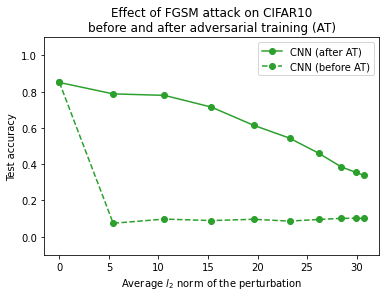

In [19]:
df_all = pd.read_csv('Post training Adversarial_Attacks_CIFAR10 [FGSM Attack].csv')
df_CNN = df_all[df_all['Target model']=='CNN']
df_CNN = df_CNN.shift(1)
print('Test accuracy on unperturbed data')
_, accurcy_Linear = Linear_CIFAR10.evaluate(X_test[indexes],y_test[indexes]);
_, accurcy_MLP = MLP_CIFAR10.evaluate(X_test[indexes],y_test[indexes]);
_, accurcy_CNN = CNN_CIFAR10.evaluate(X_test[indexes],y_test[indexes]);
df_CNN.iloc[0] = ['-', '-', 0, accurcy_Linear, accurcy_MLP, accurcy_CNN]
df_CNN
# plt.plot(df_CNN['avg_l2_norm'],df_CNN['Linear_CIFAR10_test_accuray'],'o-')
# plt.plot(df_CNN['avg_l2_norm'],df_CNN['MLP_CIFAR10_test_accuray'],'o-')
# plt.plot(df_CNN['avg_l2_norm'],df_CNN['CNN_CIFAR10_test_accuray'],'o-')
plt.plot(df_CNN['avg_l2_norm'],df_CNN['CNN_CIFAR10_test_accuray'],'o-', color = 'C2')

df_all = pd.read_csv('Adversarial_Attacks_CIFAR10 [FGSM Attack].csv')
df_CNN = df_all[df_all['Target model']=='CNN']
df_CNN = df_CNN.shift(1)
print('Test accuracy on unperturbed data')
_, accurcy_Linear = Linear_CIFAR10.evaluate(X_test[indexes],y_test[indexes]);
_, accurcy_MLP = MLP_CIFAR10.evaluate(X_test[indexes],y_test[indexes]);
_, accurcy_CNN = CNN_CIFAR10.evaluate(X_test[indexes],y_test[indexes]);
df_CNN.iloc[0] = ['-', '-', 0, accurcy_Linear, accurcy_MLP, accurcy_CNN]
df_CNN
# plt.plot(df_CNN['avg_l2_norm'],df_CNN['Linear_CIFAR10_test_accuray'],'o--', color = 'C0')
# plt.plot(df_CNN['avg_l2_norm'],df_CNN['MLP_CIFAR10_test_accuray'],'o--', color = 'C1')
plt.plot(df_CNN['avg_l2_norm'],df_CNN['CNN_CIFAR10_test_accuray'],'o--', color = 'C2')

plt.xlabel('Average $l_2$ norm of the perturbation')
plt.ylabel('Test accuracy')
plt.ylim([-0.1, 1.1])
plt.legend(['CNN (after AT)', 'CNN (before AT)'])
# plt.legend(['Linear (after AT)', 'MLP (after AT)','CNN (after AT)', \
#             'Linear (before AT)', 'MLP (before AT)','CNN (before AT)'])
plt.title('Effect of FGSM attack on CIFAR10\nbefore and after adversarial training (AT)') #\nTarget model: CNN')
plt.savefig('Post training Effect of FGSM attack on CIFAR10 for CNN model [l2 norm]_1', dpi=600)
plt.show()

# 100% accuracy on CIFAR10!!!

In [52]:
(X_train, y_train), (X_test,y_test) = keras.datasets.cifar10.load_data()
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
X_test = X_test/255.
X_train = X_train/255.
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000,), (10000, 32, 32, 3), (10000,))

In [54]:
Linear_CIFAR10 = load_model('Linear_CIFAR10.h5')
parameter = 1.0
X_test_tuned = fgsm_attack(Linear_CIFAR10,X_test,y_test,parameter)

Linear_CIFAR10_adversarial_trained = load_model('Linear_CIFAR10_FGSM_trained.h5')
Linear_CIFAR10_adversarial_trained.evaluate(X_test_tuned,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 6.0166e-05 - accuracy: 1.0000


[6.0166210460010916e-05, 1.0]

In [55]:
X_train_tuned = fgsm_attack(Linear_CIFAR10,X_train,y_train,parameter)
Linear_CIFAR10_adversarial_trained.evaluate(X_train_tuned,y_train)

1563/1563 [==============================] - 6s 3ms/step - loss: 9.3327e-05 - accuracy: 1.0000


[9.332710033049807e-05, 1.0]